In [2]:
#Following Visium H&E tutorial: from https://squidpy.readthedocs.io/en/stable/tutorials/10-Visium_HE.html

import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
import squidpy as sq
import numpy as np

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")
#importing the spatial data using read_visium 
adata = sc.read_visium("PA04_spatial", load_images=True)

scanpy==1.10.3 anndata==0.10.8 umap==0.5.9.post2 numpy==1.23.5 scipy==1.13.1 pandas==2.3.2 scikit-learn==1.2.2 statsmodels==0.14.5 igraph==0.11.9 louvain==0.8.2 pynndescent==0.5.13
squidpy==1.6.1


/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
#standard scanpy clustering and umap workflow
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata

/var/folders/lq/975sjw597cx0pdrngj4hf1tr0000gn/T/ipykernel_68993/3361898676.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


AnnData object with n_obs × n_vars = 2276 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

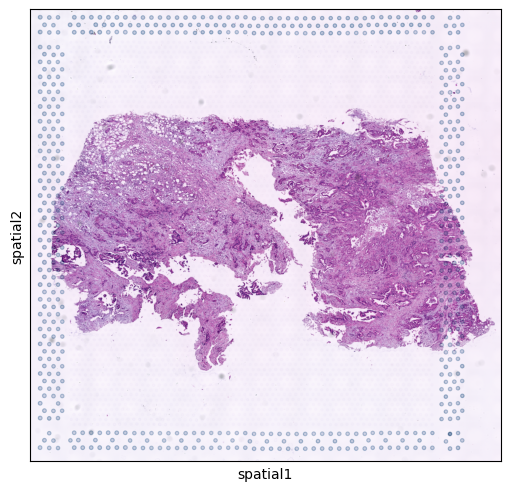

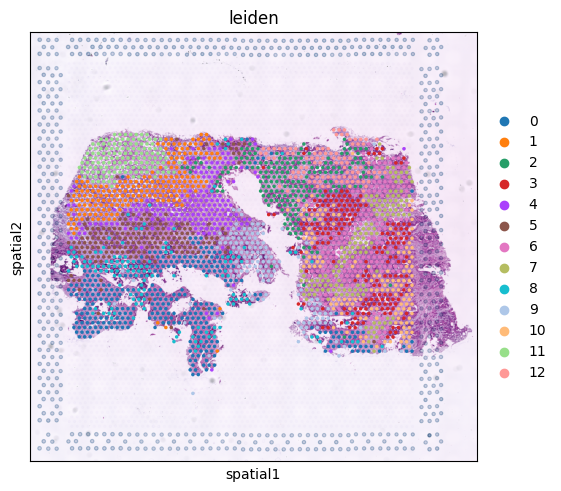

In [4]:
sq.pl.spatial_scatter(adata, size=1)
sq.pl.spatial_scatter(adata, color="leiden", size=1)

In [5]:
import json
img_path = "PA04_spatial/spatial/tissue_hires_image.png"
img = sq.im.ImageContainer(img_path)
with open("PA04_spatial/spatial/scalefactors_json.json") as f:
    sf = json.load(f)
scl = sf["tissue_hires_scalef"]
adata.obsm["spatial"] = adata.obsm["spatial"].copy() * scl
#scaling the coordinates to match the highres image

# calculate features for different scales (higher value means more context)
for scale in [1.0, 2.0]:
    feature_name = f"features_summary_scale{scale}"
    sq.im.calculate_image_features(
        adata,
        img.compute(),
        features="summary",
        key_added=feature_name,
        n_jobs=4,
        scale=scale,
    )

# combine features in one dataframe
adata.obsm["features"] = pd.concat(
    [adata.obsm[f] for f in adata.obsm.keys() if "features_summary" in f],
    axis="columns",
)

# make sure that we have no duplicated feature names in the combined table
adata.obsm["features"].columns = ad.utils.make_index_unique(
    adata.obsm["features"].columns
)

  0%|          | 0/2276 [00:00<?, ?/s]

/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: Runtim

  0%|          | 0/2276 [00:00<?, ?/s]

/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [6]:
adata.obsm["features"].head()

summary_ch-0_quantile-0.9  summary_ch-0_quantile-0.5  \
AAACAAGTATCTCCCA-1                      231.0                      193.0   
AAACAGCTTTCAGAAG-1                      243.0                      188.0   
AAACAGGGTCTATATT-1                      245.0                      191.0   
AAACATTTCCCGGATT-1                      247.0                      243.0   
AAACCCGAACGAAATC-1                      208.0                      185.0   

                    summary_ch-0_quantile-0.1  summary_ch-0_mean  \
AAACAAGTATCTCCCA-1                      139.0         187.294718   
AAACAGCTTTCAGAAG-1                      124.0         181.535188   
AAACAGGGTCTATATT-1                      130.0         187.893251   
AAACATTTCCCGGATT-1                      168.0         220.393313   
AAACCCGAACGAAATC-1                      137.0         179.300931   

                    summary_ch-0_std  summary_ch-1_quantile-0.9  \
AAACAAGTATCTCCCA-1         35.075708                      205.0   
AAACAGCTTTCAGAAG-1         42.243307                      230.0   
AAACAGGGTCTATATT-1         43.861931                      234.0   
AAACATTTCCCGGATT-1         37.784040                      241.0   
AAACCCGAACGAAATC-1         29.853291                      158.0   

                    summary_ch-1_quantile-0.5  summary_ch-1_quantile-0.1  \
AAACAAGTATCTCCCA-1                      123.0                       67.0   
AAACAGCTTTCAGAAG-1                      134.0                       58.0   
AAACAGGGTCTATATT-1                      139.0                       62.0   
AAACATTTCCCGGATT-1                      235.0                       91.0   
AAACCCGAACGAAATC-1                      109.0                       66.0   

                    summary_ch-1_mean  summary_ch-1_std  ...  \
AAACAAGTATCTCCCA-1         127.037832         49.443001  ...   
AAACAGCTTTCAGAAG-1         134.182610         56.438581  ...   
AAACAGGGTCTATATT-1         143.473108         59.871651  ...   
AAACATTTCCCGGATT-1         193.563336         63.152186  ...   
AAACCCGAACGAAATC-1         111.611743         38.468219  ...   

                    summary_ch-1_quantile-0.9-1  summary_ch-1_quantile-0.5-1  \
AAACAAGTATCTCCCA-1                        194.0                        123.0   
AAACAGCTTTCAGAAG-1                        226.0                        133.0   
AAACAGGGTCTATATT-1                        232.0                        138.0   
AAACATTTCCCGGATT-1                        241.0                        235.0   
AAACCCGAACGAAATC-1                        152.0                        108.0   

                    summary_ch-1_quantile-0.1-1  summary_ch-1_mean-1  \
AAACAAGTATCTCCCA-1                         71.0           126.569273   
AAACAGCTTTCAGAAG-1                         63.0           133.721479   
AAACAGGGTCTATATT-1                         67.0           143.012578   
AAACATTTCCCGGATT-1                         94.0           193.145765   
AAACCCGAACGAAATC-1                         70.0           111.145294   

                    summary_ch-1_std-1  summary_ch-2_quantile-0.9-1  \
AAACAAGTATCTCCCA-1           46.449899                        226.0   
AAACAGCTTTCAGAAG-1           53.291120                        243.0   
AAACAGGGTCTATATT-1           56.908790                        247.0   
AAACATTTCCCGGATT-1           61.944071                        250.0   
AAACCCGAACGAAATC-1           34.963922                        203.0   

                    summary_ch-2_quantile-0.5-1  summary_ch-2_quantile-0.1-1  \
AAACAAGTATCTCCCA-1                        187.0                        154.0   
AAACAGCTTTCAGAAG-1                        193.0                        148.0   
AAACAGGGTCTATATT-1                        196.0                        150.0   
AAACATTTCCCGGATT-1                        248.0                        169.0   
AAACCCGAACGAAATC-1                        180.0                        154.0   

                    summary_ch-2_mean-1  summary_ch-2_std-1  
AAACAAGTATCTCCCA-1       

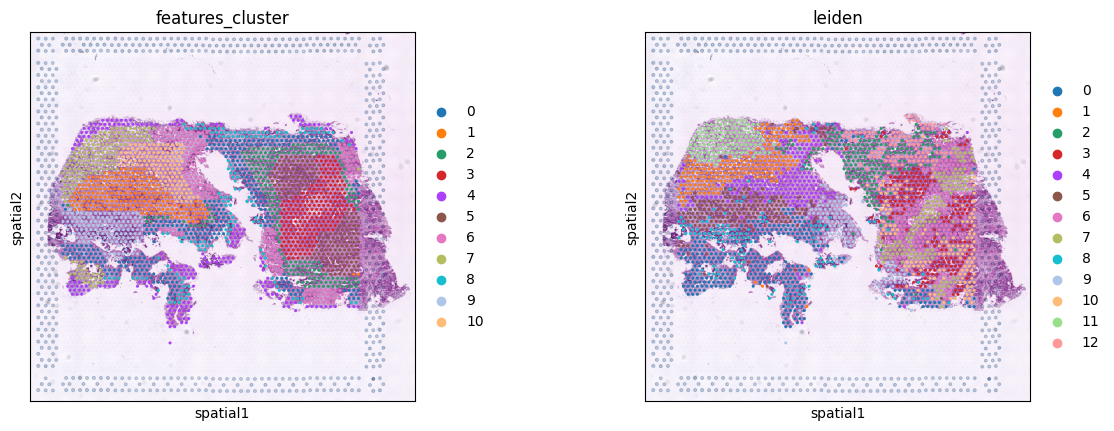

In [7]:
# helper function returning a clustering
def cluster_features(features: pd.DataFrame, like=None) -> pd.Series:
    #like is a string to filter the features
    """
    Calculate leiden clustering of features.

    Specify filter of features using `like`.
    """
    # filter features
    if like is not None:
        features = features.filter(like=like)
    # create temporary adata to calculate the clustering
    adata = ad.AnnData(features)
    # important - feature values are not scaled, so need to scale them before PCA
    sc.pp.scale(adata)
    # calculate leiden clustering
    sc.pp.pca(adata, n_comps=min(15, features.shape[1] - 1))
    sc.pp.neighbors(adata, n_pcs=15)
    sc.tl.leiden(adata, resolution=0.4)

    return adata.obs["leiden"]

# calculate feature clusters
adata.obs["features_cluster"] = cluster_features(adata.obsm["features"], like="summary")

adata.obsm["spatial"] = adata.obsm["spatial"].copy() / scl
# divide by scl to get back to original coordinates for plotting

# compare feature and gene clusters
sq.pl.spatial_scatter(adata, color=["features_cluster", "leiden"], size= 1)

  0%|          | 0/1000 [00:00<?, ?/s]

/Users/anushkadole/PDAC-scRNA/.venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


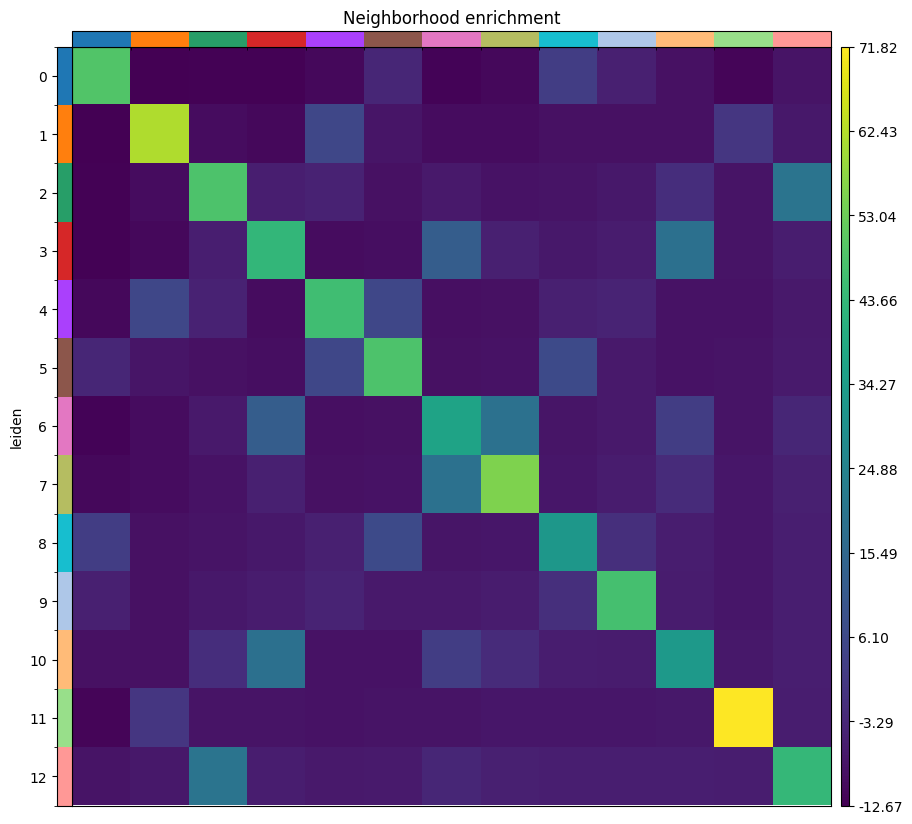

In [8]:
#Neighborhood Enrichment
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="leiden")
sq.pl.nhood_enrichment(adata, cluster_key="leiden")

In [9]:
#using SpaGCN for spatial detection (this cell imports the packages)
import os,csv,re
import pandas as pd
import numpy as np
import scanpy as sc
import math
import SpaGCN as spg
from scipy.sparse import issparse
import random, torch
import warnings
warnings.filterwarnings("ignore")
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import SpaGCN as spg
#In order to read in image data, we need to install some package. Here we recommend package "opencv"
#install opencv in python
#!pip3 install opencv-python
import cv2

spg.__version__

'1.2.7'

In [10]:
# Current version of SpaGCN needs:
    # The gene expression matrix(n by k): expression_matrix.h5;
    # Spatial coordinateds of samplespositions.txt;
    # Histology image(optional): histology.tif, can be tif or png or jepg.

spatial = pd.read_csv("PA04_spatial/spatial/tissue_positions.csv",sep=",",header=0,dtype={1: int, 2: float, 3: float, 4: int, 5: int},index_col=0) 

# spatial.shape
spatial_aligned = spatial.loc[adata.obs_names]
print(spatial.head)       # shows (n_rows, n_columns)


<bound method NDFrame.head of                     in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
ACGCCTGACACGCGCT-1          0        0.0        0.0                2160   
TACCGATCCAACACTT-1          0        1.0        1.0                2477   
ATTAAAGCGGACGAGC-1          0        0.0        2.0                2160   
GATAAGGGACGATTAG-1          0        1.0        3.0                2477   
GTGCAAATCACCAATA-1          0        0.0        4.0                2160   
...                       ...        ...        ...                 ...   
GAACGTTTGTATCCAC-1          0       77.0      123.0               26554   
ATTGAATTCCCTGTAG-1          0       76.0      124.0               26237   
TACCTCACCAATTGTA-1          0       77.0      125.0               26554   
AGTCGAATTAGCGTAA-1          0       76.0      126.0               26238   
TTGAAGTGCATCTACA-1          0       77.0      127.0               2655

In [11]:
adata.obs["x1"] = spatial_aligned["in_tissue"]
adata.obs["x2"] = spatial_aligned["array_row"]
adata.obs["x3"] = spatial_aligned["array_col"]
adata.obs["x4"] = spatial_aligned["pxl_row_in_fullres"]
adata.obs["x5"] = spatial_aligned["pxl_col_in_fullres"]
adata.obs["x_array"] = adata.obs["x2"]
adata.obs["y_array"] = adata.obs["x3"]
adata.obs["x_pixel"] = (adata.obs["x4"] * scl).astype(int)
adata.obs["y_pixel"] = (adata.obs["x5"] * scl).astype(int)

In [13]:
adata.obs


in_tissue  array_row  array_col leiden features_cluster  \
AAACAAGTATCTCCCA-1          1         50        102     10                2   
AAACAGCTTTCAGAAG-1          1         43          9      8                9   
AAACAGGGTCTATATT-1          1         47         13      0                0   
AAACATTTCCCGGATT-1          1         61         97      4                4   
AAACCCGAACGAAATC-1          1         45        115     10                5   
...                       ...        ...        ...    ...              ...   
TTGTGGTAGGAGGGAT-1          1         50         28      8                0   
TTGTGGTATAGGTATG-1          1         24        126      7                6   
TTGTGTTTCCCGAAAG-1          1         51         59      8                4   
TTGTTAGCAAATTCGA-1          1         22         42      2               10   
TTGTTTCCATACAACT-1          1         45         27      0                9   

                    x1    x2     x3     x4     x5  x_array  y_array  x_pixel  \
AAACAAGTATCTCCCA-1   1  50.0  102.0  18002  21174     50.0    102.0     1195   
AAACAGCTTTCAGAAG-1   1  43.0    9.0  15776   4251     43.0      9.0     1047   
AAACAGGGTCTATATT-1   1  47.0   13.0  17043   4979     47.0     13.0     1131   
AAACATTTCCCGGATT-1   1  61.0   97.0  21485  20262     61.0     97.0     1426   
AAACCCGAACGAAATC-1   1  45.0  115.0  16421  23541     45.0    115.0     1090   
...                 ..   ...    ...    ...    ...      ...      ...      ...   
TTGTGGTAGGAGGGAT-1   1  50.0   28.0  17995   7708     50.0     28.0     1194   
TTGTGGTATAGGTATG-1   1  24.0  126.0   9772  25546     24.0    126.0      648   
TTGTGTTTCCCGAAAG-1   1  51.0   59.0  18315  13349     51.0     59.0     1216   
TTGTTAGCAAATTCGA-1   1  22.0   42.0   9130  10261     22.0     42.0      606   
TTGTTTCCATACAACT-1   1  45.0   27.0  16412   7527     45.0     27.0     1089   

                    y_pixel  
AAACAAGTATCTCCCA-1     1405  
AAACAGCTTTCAGAAG-1      282  
AAACAGGGTCTATATT-1      330  
AAACATTTCCCGGATT-1     1345  
AAACCCGAACGAAATC-1     1563  
...                     ...  
TTGTGGTAGGAGGGAT-1      511  
TTGTGGTATAGGTATG-1     1696  
TTGTGTTTCCCGAAAG-1      886  
TTGTTAGCAAATTCGA-1      681  
TTGTTTCCATACAACT-1      499  

[2276 rows x 14 columns]

In [14]:
print(spatial.head())

                    in_tissue  array_row  array_col  pxl_row_in_fullres  \
barcode                                                                   
ACGCCTGACACGCGCT-1          0        0.0        0.0                2160   
TACCGATCCAACACTT-1          0        1.0        1.0                2477   
ATTAAAGCGGACGAGC-1          0        0.0        2.0                2160   
GATAAGGGACGATTAG-1          0        1.0        3.0                2477   
GTGCAAATCACCAATA-1          0        0.0        4.0                2160   

                    pxl_col_in_fullres  
barcode                                 
ACGCCTGACACGCGCT-1                2621  
TACCGATCCAACACTT-1                2803  
ATTAAAGCGGACGAGC-1                2985  
GATAAGGGACGATTAG-1                3167  
GTGCAAATCACCAATA-1                3349  


In [15]:
img=cv2.imread("PA04_spatial/spatial/tissue_hires_image.png")
print(img.shape)

#Set coordinates
x_array = adata.obs["x_array"].tolist()
y_array = adata.obs["y_array"].tolist()
x_pixel = adata.obs["x_pixel"].tolist()
y_pixel = adata.obs["y_pixel"].tolist()

row_pixel = y_pixel
col_pixel = x_pixel


res=10
img_new=img.copy()
for i in range(len(x_pixel)):
	x=x_pixel[i]
	y=y_pixel[i]
	img_new[int(x-res):int(x+res), int(y-res):int(y+res),:]=255

cv2.imwrite('./test_mapping_PA04.jpg', img_new)

#Calculate adjacency matrix

s=1
b=49
adj = spg.calculate_adj_matrix(
    x=row_pixel, y=col_pixel,
    x_pixel=row_pixel, y_pixel=col_pixel,
    image=img, beta=b, alpha=s, histology=True
)

# adj=spg.calculate_adj_matrix(x=x_pixel,y=y_pixel, x_pixel=x_pixel, y_pixel=y_pixel, image=img, beta=b, alpha=s, histology=True)
#If histlogy image is not available, SpaGCN can calculate the adjacent matrix using the fnction below
#adj=calculate_adj_matrix(x=x_pixel,y=y_pixel, histology=False)
np.savetxt('adj.csv', adj, delimiter=',')

(1920, 2000, 3)
Calculateing adj matrix using histology image...
Var of c0,c1,c2 =  753.5665580267201 2402.0700816761946 771.3459254624813
Var of x,y,z =  215707.1828702345 67920.85288762389 215707.1828702345


In [16]:
spg.prefilter_genes(adata,min_cells=3) # avoiding all genes are zeros
spg.prefilter_specialgenes(adata)
#Normalize and take log for UMI - I already did this in the squidpy workflow
# sc.pp.normalize_per_cell(adata_PA12)
# sc.pp.log1p(adata_PA12)

In [17]:
p=0.5 
#Find the l value given p
l=spg.search_l(p, adj, start=0.01, end=1000, tol=0.01, max_run=100)

""" 
    p: Percentage of total expression contributed by neighborhoods.
    l: Parameter to control p.
"""

Run 1: l [0.01, 1000], p [0.0, 1464.987145017104]
Run 2: l [0.01, 500.005], p [0.0, 661.6780395507812]
Run 3: l [0.01, 250.0075], p [0.0, 237.41152954101562]
Run 4: l [0.01, 125.00874999999999], p [0.0, 76.02088165283203]
Run 5: l [0.01, 62.509375], p [0.0, 21.081348419189453]
Run 6: l [0.01, 31.2596875], p [0.0, 4.929107666015625]
Run 7: l [0.01, 15.63484375], p [0.0, 0.8057056665420532]
Run 8: l [7.822421875, 15.63484375], p [0.014223814010620117, 0.8057056665420532]
Run 9: l [11.728632812499999, 15.63484375], p [0.2585068941116333, 0.8057056665420532]
recommended l =  13.681738281249999


' \n    p: Percentage of total expression contributed by neighborhoods.\n    l: Parameter to control p.\n'

In [18]:
""" 
    n_clusters: Number of spatial domains wanted.
    res: Resolution in the initial Louvain's Clustering methods. If the number of clusters is known, we can use the spg.search_res() fnction to search for suitable resolution(optional).
"""

n_clusters=10
#Set seed = to ensure the data does the same clustering every time
r_seed=t_seed=n_seed=100

#Search for suitable resolution
res=spg.search_res(adata, 
                   adj, l, 
                   n_clusters, 
                   start=0.7, 
                   step=0.1, 
                   tol=5e-3, 
                   lr=0.05, 
                   max_epochs=20, 
                   r_seed=r_seed, 
                   t_seed=t_seed, 
                   n_seed=n_seed)



Start at res =  0.7 step =  0.1
Initializing cluster centers with louvain, resolution =  0.7
Epoch  0
Epoch  10
Res =  0.7 Num of clusters =  11
Initializing cluster centers with louvain, resolution =  0.6
Epoch  0
Epoch  10
Res =  0.6 Num of clusters =  9
Step changed to 0.05
Initializing cluster centers with louvain, resolution =  0.6499999999999999
Epoch  0
Epoch  10
Res =  0.6499999999999999 Num of clusters =  9
Step changed to 0.025
Initializing cluster centers with louvain, resolution =  0.6749999999999999
Epoch  0
Epoch  10
Res =  0.6749999999999999 Num of clusters =  9
Step changed to 0.0125
Initializing cluster centers with louvain, resolution =  0.6875
Epoch  0
Epoch  10
Res =  0.6875 Num of clusters =  10
recommended res =  0.6875


In [19]:
clf=spg.SpaGCN()
clf.set_l(l)
#Set seed
random.seed(r_seed)
torch.manual_seed(t_seed)
np.random.seed(n_seed)
#Run
clf.train(adata,adj,init_spa=True,init="louvain",res=res, tol=5e-3, lr=0.05, max_epochs=200)
y_pred, prob=clf.predict()
adata.obs["pred"]= y_pred
adata.obs["pred"]= adata.obs["pred"].astype('category')
#Do cluster refinement(optional)
#shape="hexagon" for Visium data, "square" for ST data.
adj_2d=spg.calculate_adj_matrix(x=x_array,y=y_array, histology=False)
refined_pred=spg.refine(sample_id=adata.obs.index.tolist(), pred=adata.obs["pred"].tolist(), dis=adj_2d, shape="hexagon")
adata.obs["refined_pred"]=refined_pred
adata.obs["refined_pred"]=adata.obs["refined_pred"].astype('category')

Initializing cluster centers with louvain, resolution =  0.6875
Epoch  0
Epoch  10
Epoch  20
delta_label  0.0021968365553602814 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 28
Calculateing adj matrix using xy only...


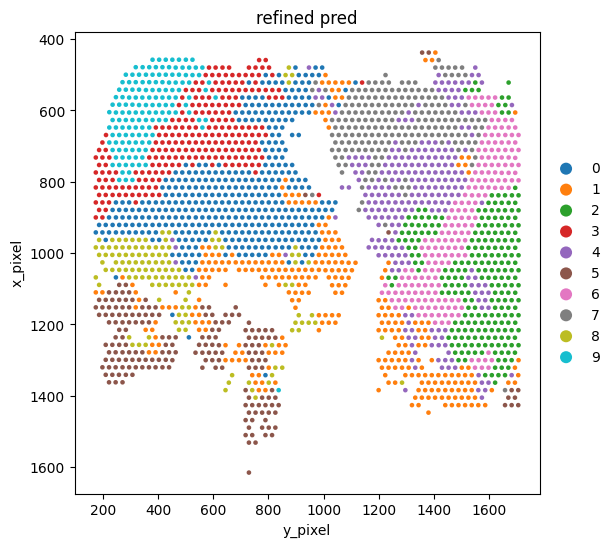

In [20]:
# Plot refined domains

fig, ax = plt.subplots(figsize=(6,6))

sc.pl.scatter(
    adata,
    x="y_pixel",
    y="x_pixel",
    color="refined_pred",
    alpha=1,
    size=100000/adata.shape[0],
    show=False,
    ax=ax
)

ax.invert_yaxis()

In [31]:
#Read in original data (filtered feature bc matrix) to identify SVGs

filtered = sc.read_10x_h5("PA04_spatial/filtered_feature_bc_matrix.h5")
filtered.var_names_make_unique()

filtered.obs["pred"] = adata.obs["pred"].astype('category')
filtered.obs["x_array"] = adata.obs["x_array"]
filtered.obs["y_array"] = adata.obs["y_array"]
filtered.obs["x_pixel"] = adata.obs["x_pixel"]
filtered.obs["y_pixel"] = adata.obs["y_pixel"]

from scipy.sparse import issparse
filtered.X = filtered.X.A if issparse(filtered.X) else filtered.X

sc.pp.log1p(filtered)


In [34]:
#Use domain 0 as an example - this code is taken from the spaGCN tutorial, as an example
# print(adata.obs['refined_pred'].value_counts())
# print(filtered.obs["pred"].unique())
target=2

#Set filtering criteria
min_in_group_fraction=0.8
min_in_out_group_ratio=1
min_fold_change=1.5

#Search radius such that each spot in the target domain has approximately 10 neighbors on average
adj_2d=spg.calculate_adj_matrix(x=x_array, y=y_array, histology=False)
start, end= np.quantile(adj_2d[adj_2d!=0],q=0.001), np.quantile(adj_2d[adj_2d!=0],q=0.1)
r=spg.search_radius(target_cluster=target, cell_id=adata.obs.index.tolist(), x=x_array, y=y_array, pred=adata.obs["pred"].tolist(), start=start, end=end, num_min=10, num_max=14,  max_run=100)

#Detect neighboring domains
nbr_domians=spg.find_neighbor_clusters(target_cluster=target,
                                   cell_id = filtered.obs.index.tolist(), 
                                   x = filtered.obs["x_array"].tolist(), 
                                   y = filtered.obs["y_array"].tolist(), 
                                   pred = filtered.obs["pred"].tolist(),
                                   radius=r,
                                   ratio=1/2)

nbr_domians=nbr_domians[0:3]
de_genes_info=spg.rank_genes_groups(input_adata = filtered,
                                target_cluster=target,
                                nbr_list=nbr_domians, 
                                label_col="pred", 
                                adj_nbr=True, 
                                log=True)

#Filter genes
de_genes_info=de_genes_info[(de_genes_info["pvals_adj"]<0.05)]
filtered_info=de_genes_info
filtered_info=filtered_info[(filtered_info["pvals_adj"]<0.05) &
                            (filtered_info["in_out_group_ratio"]>min_in_out_group_ratio) &
                            (filtered_info["in_group_fraction"]>min_in_group_fraction) &
                            (filtered_info["fold_change"]>min_fold_change)]
filtered_info=filtered_info.sort_values(by="in_group_fraction", ascending=False)
filtered_info["target_dmain"]=target
filtered_info["neighbors"]=str(nbr_domians)
print("SVGs for domain ", str(target),":", filtered_info["genes"].tolist())

Calculateing adj matrix using xy only...
Calculateing adj matrix using xy only...
Calculateing adj matrix using xy only...
Run 1: radius [1.4142135381698608, 14.21267032623291], num_nbr [1.0, 248.0212765957447]
Calculateing adj matrix using xy only...
Run 2: radius [1.4142135381698608, 7.8134419322013855], num_nbr [1.0, 86.34468085106383]
Calculateing adj matrix using xy only...
Run 3: radius [1.4142135381698608, 4.613827735185623], num_nbr [1.0, 34.62978723404255]
Calculateing adj matrix using xy only...
recommended radius =  3.014020636677742 num_nbr=12.557446808510639
radius= 3.014020636677742 average number of neighbors for each spot is 12.557446808510639
 Cluster 2 has neighbors:
Dmain  6 :  359
Dmain  4 :  246
SVGs for domain  2 : ['OLFM4', 'TFF1', 'TFF2', 'DMBT1']


In [35]:
filtered_info

genes  in_group_fraction  out_group_fraction  in_out_group_ratio  \
7  OLFM4           0.991489            0.975610            1.016277   
0   TFF1           0.982979            0.975610            1.007553   
2   TFF2           0.970213            0.917960            1.056923   
6  DMBT1           0.893617            0.762749            1.171573   

   in_group_mean_exp  out_group_mean_exp  fold_change     pvals_adj  \
7           3.034103            2.482745     1.735609  1.390997e-09   
0           2.693899            2.062602     1.880047  2.127323e-18   
2           2.065564            1.425723     1.896180  1.099993e-11   
6           1.557154            1.058670     1.646224  5.789118e-10   

   target_dmain neighbors  
7             2    [6, 4]  
0             2    [6, 4]  
2             2    [6, 4]  
6             2    [6, 4]

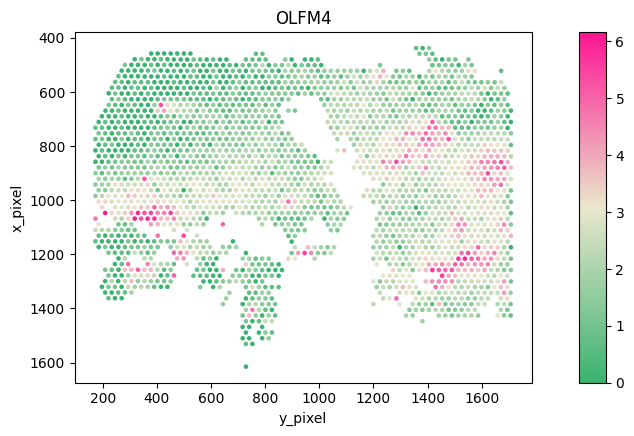

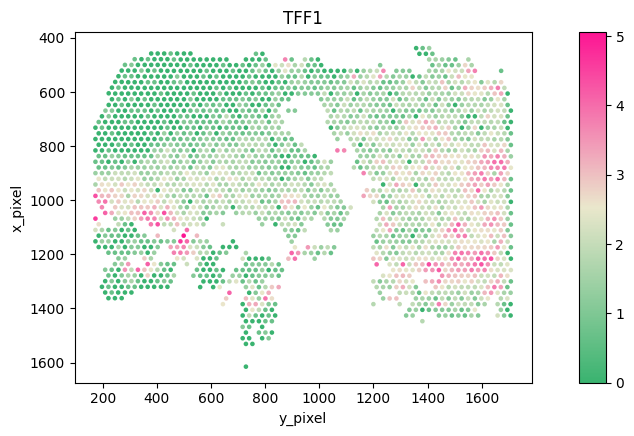

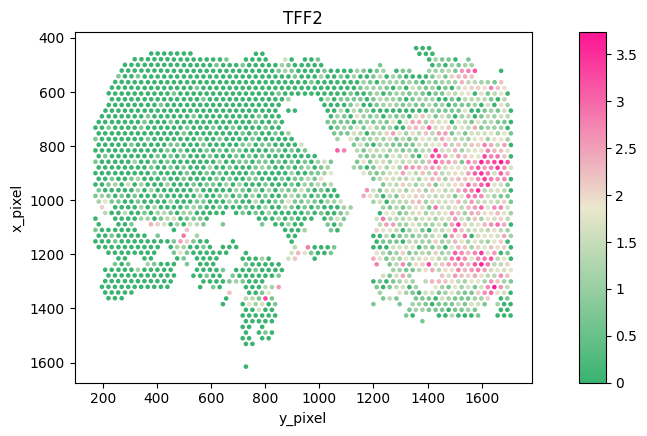

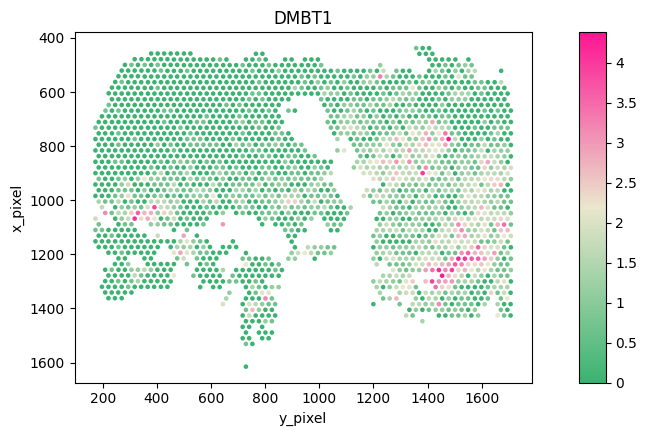

In [ ]:
#Plot refined spatial domains
color_self = clr.LinearSegmentedColormap.from_list('pink_green', ['#3AB370',"#EAE7CC","#FD1593"], N=256)
for g in filtered_info["genes"].tolist():
    filtered.obs["exp"]=filtered.X[:,filtered.var.index==g]
    ax=sc.pl.scatter(filtered,alpha=1,x="y_pixel",y="x_pixel",color="exp",title=g,color_map=color_self,show=False,size=100000/filtered.shape[0])
    ax.set_aspect('equal', 'box')
    ax.axes.invert_yaxis()
    plt.show()

In [37]:
adata.obs

in_tissue  array_row  array_col leiden features_cluster  \
AAACAAGTATCTCCCA-1          1         50        102     10                2   
AAACAGCTTTCAGAAG-1          1         43          9      8                9   
AAACAGGGTCTATATT-1          1         47         13      0                0   
AAACATTTCCCGGATT-1          1         61         97      4                4   
AAACCCGAACGAAATC-1          1         45        115     10                5   
...                       ...        ...        ...    ...              ...   
TTGTGGTAGGAGGGAT-1          1         50         28      8                0   
TTGTGGTATAGGTATG-1          1         24        126      7                6   
TTGTGTTTCCCGAAAG-1          1         51         59      8                4   
TTGTTAGCAAATTCGA-1          1         22         42      2               10   
TTGTTTCCATACAACT-1          1         45         27      0                9   

                    x1    x2     x3     x4     x5  x_array  y_array  x_pixel  \
AAACAAGTATCTCCCA-1   1  50.0  102.0  18002  21174     50.0    102.0     1195   
AAACAGCTTTCAGAAG-1   1  43.0    9.0  15776   4251     43.0      9.0     1047   
AAACAGGGTCTATATT-1   1  47.0   13.0  17043   4979     47.0     13.0     1131   
AAACATTTCCCGGATT-1   1  61.0   97.0  21485  20262     61.0     97.0     1426   
AAACCCGAACGAAATC-1   1  45.0  115.0  16421  23541     45.0    115.0     1090   
...                 ..   ...    ...    ...    ...      ...      ...      ...   
TTGTGGTAGGAGGGAT-1   1  50.0   28.0  17995   7708     50.0     28.0     1194   
TTGTGGTATAGGTATG-1   1  24.0  126.0   9772  25546     24.0    126.0      648   
TTGTGTTTCCCGAAAG-1   1  51.0   59.0  18315  13349     51.0     59.0     1216   
TTGTTAGCAAATTCGA-1   1  22.0   42.0   9130  10261     22.0     42.0      606   
TTGTTTCCATACAACT-1   1  45.0   27.0  16412   7527     45.0     27.0     1089   

                    y_pixel pred refined_pred  
AAACAAGTATCTCCCA-1     1405    6            6  
AAACAGCTTTCAGAAG-1      282    8            8  
AAACAGGGTCTATATT-1      330    1            1  
AAACATTTCCCGGATT-1     1345    1            1  
AAACCCGAACGAAATC-1     1563    4            4  
...                     ...  ...          ...  
TTGTGGTAGGAGGGAT-1      511    8            8  
TTGTGGTATAGGTATG-1     1696    6            6  
TTGTGTTTCCCGAAAG-1      886    8            8  
TTGTTAGCAAATTCGA-1      681    0            0  
TTGTTTCCATACAACT-1      499    1            8  

[2276 rows x 16 columns]

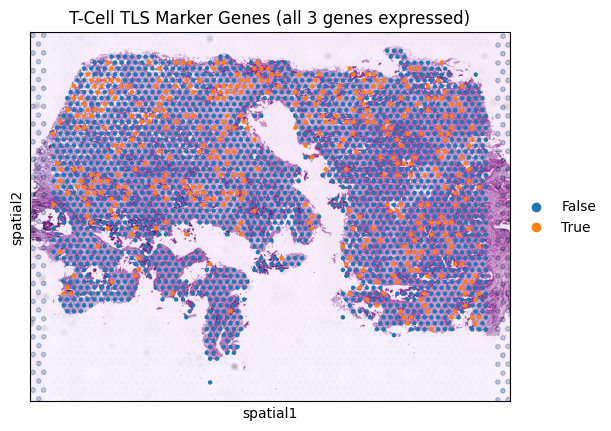

In [38]:
#barcodes for patient 12 tumor cells that are expressing TLS related genes

adata.var_names_make_unique()

tls_genes = ["CCL5", "CMTM3", "CKLF"] 

# Check which of these genes actually exist in this AnnData object
present_genes = [g for g in tls_genes if g in adata.var_names]

# Create a boolean column: True if a cell expresses ANY of the TLS genes
adata.obs["TLS_t"] = (adata[:, present_genes].X.toarray() > 0).all(axis=1)

# Then plot
sc.pl.spatial(adata, color="TLS_t", title="T-Cell TLS Marker Genes (all 3 genes expressed)")



Genes found: ['CXCR5', 'CXCL13', 'TNFSF13B']


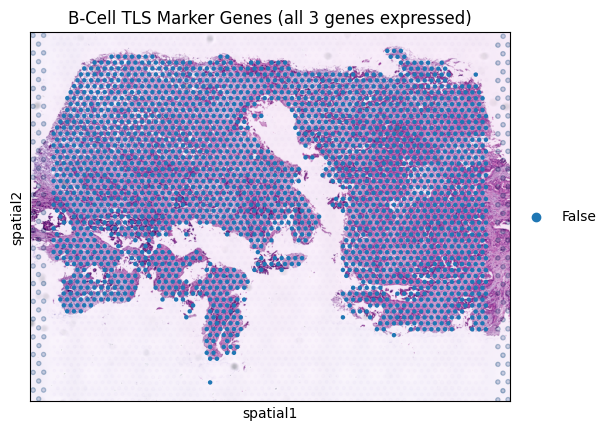

In [39]:
tls_genes_b = ["CXCR5", "CXCL13", "TNFSF13B"]

# Check which of these genes actually exist in this AnnData object
present_genes_b = [g for g in tls_genes_b if g in adata.var_names]
print("Genes found:", present_genes_b)

# True if a cell expresses all of the TLS genes
adata.obs["TLS_b"] = (adata[:, present_genes_b].X.toarray() > 0).all(axis=1)

sc.pl.spatial(adata, color="TLS_b", title="B-Cell TLS Marker Genes (all 3 genes expressed)")

Genes found: ['IL23A', 'CXCL13', 'CCL19']


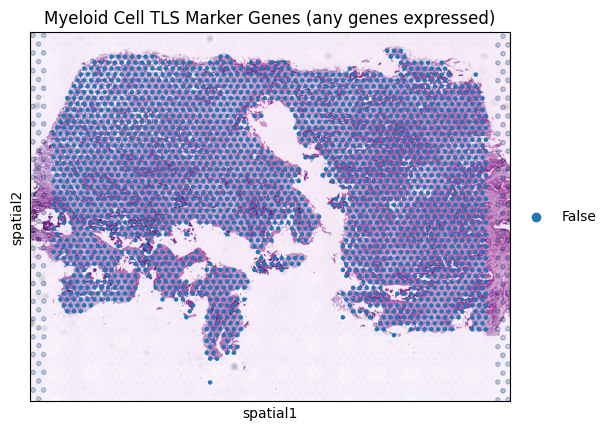

In [40]:
tls_genes_m = ["IL23A", "CXCL13", "CCL19"]

present_genes_m = [g for g in tls_genes_m if g in adata.var_names]
print("Genes found:", present_genes_m)

adata.obs["TLS_m"] = (adata[:, present_genes_m].X.toarray() > 0).all(axis=1)

sc.pl.spatial(adata, color="TLS_m", title="Myeloid Cell TLS Marker Genes (any genes expressed)")

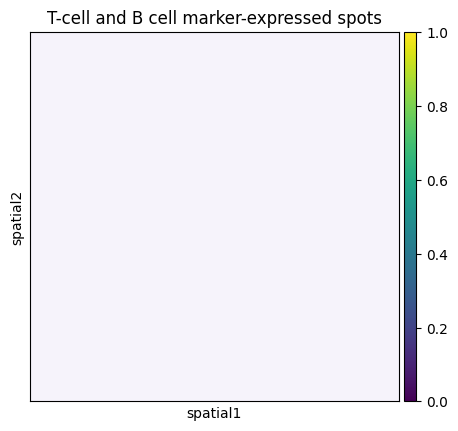

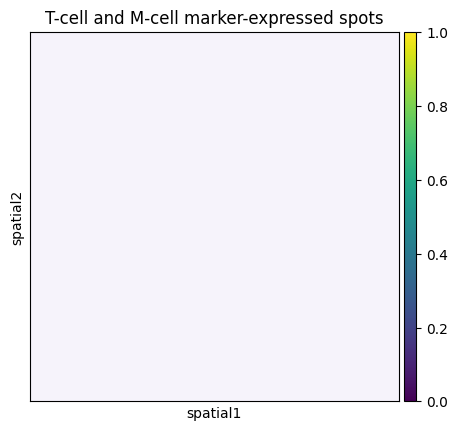

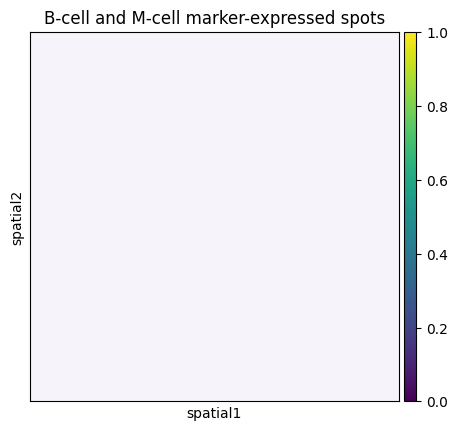

In [41]:
#Now generate a plot that overlays all the plots on 1 plot

def cytokine_marker_combos(spot):
    types = []
    if spot["TLS_t"]: types.append("T")
    if spot["TLS_b"]: types.append("B")
    if spot["TLS_m"]: types.append("M")
    return "+".join(types) if types else "None"

adata.obs["TLS_markers"] = adata.obs.apply(cytokine_marker_combos, axis=1)
subset = adata[adata.obs["TLS_markers"] == "T+B"]
sc.pl.spatial(subset, color="TLS_markers", title="T-cell and B cell marker-expressed spots")
subset = adata[adata.obs["TLS_markers"] == "T+M"]
sc.pl.spatial(subset, color="TLS_markers", title="T-cell and M-cell marker-expressed spots")
subset = adata[adata.obs["TLS_markers"] == "B+M"]
sc.pl.spatial(subset, color="TLS_markers", title="B-cell and M-cell marker-expressed spots")

Genes found: ['SOX10', 'S100B', 'MPZ']


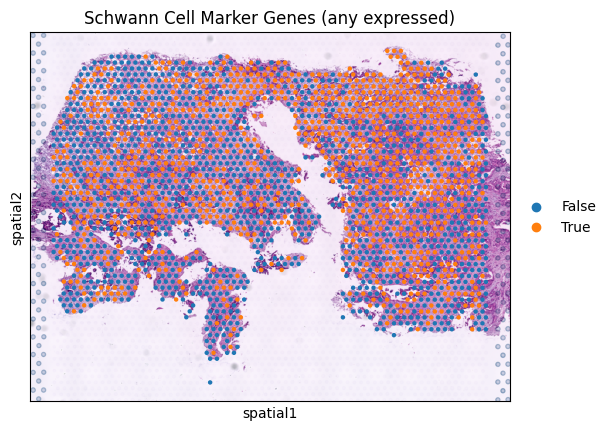

In [47]:
# Locating Schwann cell spots
schwann_genes = ["SOX10", "S100B", "MPZ"]

# Check which of these genes actually exist in this AnnData object
schwann_g = [g for g in schwann_genes if g in adata.var_names]
print("Genes found:", schwann_g)

# True if a cell expresses all of the TLS genes
adata.obs["Schwann_Markers"] = (adata[:, schwann_g].X.toarray() > 0).any(axis=1)

sc.pl.spatial(adata, color="Schwann_Markers", title="Schwann Cell Marker Genes (any expressed)")